#                          Applying ML on Autos data scrapped

#### Massaging Data EDA

In [5]:
#Importing pandas package
import pandas as pd

#Defining path of the data file to be read from
autos_ML_path='C:/Users/mrityunjay1.pandey/GreyAtom/Day2/autos.csv'
#Reading file without specifying any encoding
#autos_ML=pd.read_csv(autos_ML_path)
#running above line gives below error 
#"UnicodeDecodeError: 'utf-8' codec can't decode byte 0xdc in position 23: invalid continuation byte

#Reading data with encodng specified, both encoding Windows-1252 & Latin-1 works fine.
#autos_ML_win=pd.read_csv(autos_ML_path,encoding='Windows-1252')
autos_ML=pd.read_csv(autos_ML_path,encoding='latin-1')

In [6]:
#Getting information about the dataframe
autos_ML.info()
#getting first 5 rows of the dataframe
autos_ML.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
dateCrawled            50000 non-null object
name                   50000 non-null object
seller                 50000 non-null object
offerType              50000 non-null object
price                  50000 non-null object
abtest                 50000 non-null object
vehicleType            44905 non-null object
yearOfRegistration     50000 non-null int64
gearbox                47320 non-null object
powerPS                50000 non-null int64
model                  47242 non-null object
odometer               50000 non-null object
monthOfRegistration    50000 non-null int64
fuelType               45518 non-null object
brand                  50000 non-null object
notRepairedDamage      40171 non-null object
dateCreated            50000 non-null object
nrOfPictures           50000 non-null int64
postalCode             50000 non-null int64
lastSeen               50000 non-null obj

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [7]:
#Getting column names of the dataframe
list_columns=list(autos_ML.columns)

In [8]:
#Renaming columns as asked in the excersise
autos_ML.rename(columns={
        "yearOfRegistration":"registration_year",
        "monthOfRegistration":"registration_month",
        "notRepairedDamage":"unrepaired_damage",
        "dateCreated":"ad_created"},inplace=True)

In [9]:
#Function to convert column names in Snake Case
def to_snake_case(str):
    return ''.join(['_'+i.lower() if i.isupper()  
               else i for i in str]).lstrip('_') 
         
#Applying for loop and passing string in the function
j=0
for i in list_columns:
    list_columns[j]=to_snake_case(list_columns[j])
    j=j+1
#assigning modified name to column names
autos_ML.columns=list_columns

In [10]:
#To describe dataframe
autos_ML.describe()

,year_of_registration,power_p_s,month_of_registration,nr_of_pictures,postal_code
count,50000.000000,50000.000000,50000.000000,50000.0,50000.000000
mean,2005.073280,116.355920,5.723360,0.0,50813.627300
std,105.712813,209.216627,3.711984,0.0,25779.747957
min,1000.000000,0.000000,0.000000,0.0,1067.000000
25%,1999.000000,70.000000,3.000000,0.0,30451.000000
50%,2003.000000,105.000000,6.000000,0.0,49577.000000
75%,2008.000000,150.000000,9.000000,0.0,71540.000000
max,9999.000000,17700.000000,12.000000,0.0,99998.000000


##### DataType correction
- date_crawled             50000 non-null object ---------->Should be DateTime Object
- price                    50000 non-null object ---------->Should be integer
- odometer                 50000 non-null object ---------->Should be integer
- date_created             50000 non-null object ---------->Should be Date Time 
- last_seen                50000 non-null object ---------->Should be Date

In [11]:
#Replacing special symbols "$ & ," from Price
autos_ML.price=autos_ML.price.str.replace(",","").str.replace("$","").astype(int)

In [12]:
#Renaming odometer column to odomete_KM for better understanding and removing "," & "KM" from odometer data.
#Converting type of odometer_km from object to float
autos_ML.rename(columns={"odometer":"odometer_km"},inplace=True)
autos_ML.odometer_km=autos_ML.odometer_km.str.replace(",","").str.replace("km","").astype(float)

In [13]:
#Conveting date_crawled to datetime
autos_ML.date_crawled=pd.to_datetime(autos_ML.date_crawled)

In [14]:
#Conveting date_created to datetime
autos_ML.date_created=pd.to_datetime(autos_ML.date_created)

In [15]:
#Conveting last_seen to datetime
autos_ML.last_seen=pd.to_datetime(autos_ML.last_seen)

#### Identifying columns to drop.
Since **nr_of_pictures** has values 0 for all records hence no influnnce in the model, thus candidate for **dropping**.


In [16]:
autos_ML.drop(["nr_of_pictures"],1,inplace=True)

**seller** column has 2 values with 49999 records having same and 1 of different hence no influnce on the model.Thus **candidate for dropping.**


In [17]:
autos_ML.drop(["seller"],1,inplace=True)

**Offer_type** has similar type of value for all records except 1 thus **candidate of dropping.**


In [18]:
autos_ML.drop(["offer_type"],1,inplace=True)

**postal_code** is a demographic data having not much influence thus **candidate of dropping.**

In [19]:
autos_ML.drop(["postal_code"],1,inplace=True)

##                                    --------------------Solution of Part 4--------------------

####            =============Analysis of odometer_km data=================

In [20]:
autos_ML[autos_ML["odometer_km"]<125000].odometer_km.value_counts()

100000.0    2169
90000.0     1757
80000.0     1436
70000.0     1230
60000.0     1164
50000.0     1027
5000.0       967
40000.0      819
30000.0      789
20000.0      784
10000.0      264
Name: odometer_km, dtype: int64

In [21]:
autos_ML[autos_ML["odometer_km"]<125000].odometer_km.value_counts().sum()

12406

In [22]:
autos_ML[autos_ML["odometer_km"]>125000].odometer_km.value_counts().sum()

32424

In [23]:
autos_ML[autos_ML["odometer_km"]==125000].odometer_km.value_counts().sum()

5170

Above analysis of data suggest there are huge values however not necessary these are outliers.Since these are KM driven and the car is used car,it is highly likely that owner of the car has driven these many KM.Will further investigate on Price data for finding if there are any outlier.

####            =============Analysis of price data=================

In [24]:
autos_ML.price.value_counts()

0        1421
500       781
1500      734
2500      643
1000      639
         ... 
20790       1
8970        1
846         1
2895        1
33980       1
Name: price, Length: 2357, dtype: int64

Above analysis says there are data in **price** columns with **values 0** and few with **single entries.**

In [25]:
#For Finding total number pf records with price as 0
autos_ML[autos_ML.price==0].price.value_counts().sum()

1421

There are **1421** records having **price as 0**.Since this is an advertisement for **selling cars**, there should not be any advertisement of used car having price as 0. Thus **droping these records.**


In [26]:
autos_ML.drop(autos_ML[autos_ML.price==0].index,0,inplace=True)

In [27]:
#Sorting dataframe on price column in descending
autos_ML.sort_values("price",ascending=False,inplace=True)

Post sorting price in decending, it is evident there are values not practically possible for price of used cars.droping top 7 rows of price having outliers.

In [28]:
autos_ML.drop(autos_ML.price.head(7).index,0,inplace=True)

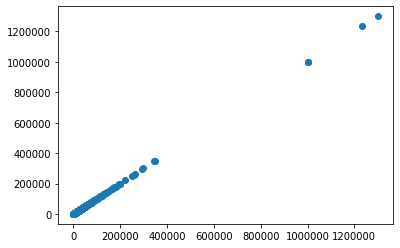

In [31]:
#Plotting scatterplot still shows 2 outliers in price.droping those 2 as well.
import matplotlib.pyplot as plt
plt.scatter(autos_ML.price,autos_ML.price)

With help of above scatter plot it seems there are still few outliers,dropping top 2.

In [32]:
autos_ML.drop(autos_ML.price.head(2).index,0,inplace=True)

Further analysis shows price range is still skewed thus **dropping columns having price as 1**

In [33]:
autos_ML.drop(autos_ML[autos_ML.price==1].price.index,0,inplace=True)

Plotting scatter plot to check if there are still outliers.


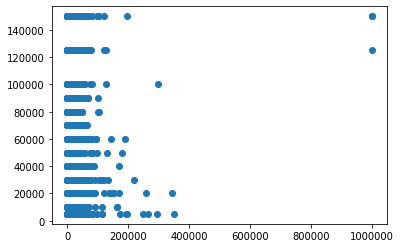

In [34]:
plt.scatter(autos_ML.price,autos_ML.odometer_km)

Further analysis reveals there are still outliers for odometer_km & price.Since these are used cars with more odometer_KM the price of car should not increase.**Removing 5 outliers from price more than 600000**

In [35]:
autos_ML.drop(autos_ML[autos_ML.price>600000].index,0,inplace=True)

#### Binning data for analysis
Defining bin using **qcut**

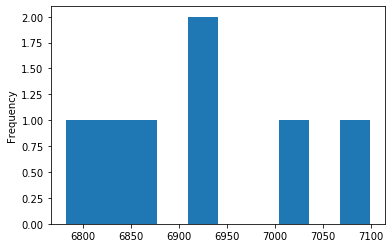

In [36]:
pd.qcut(autos_ML['price'], q=7).value_counts().plot(kind="hist")

##                                    --------------------Solution of Part 5--------------------

In [37]:
#Converting data in date_crawled from yyyy-mm-dd hh:mm:ss to yyyy-mm-dd
autos_ML.date_crawled=pd.to_datetime(autos_ML.date_crawled,format='%d/%m/%y').dt.strftime('%d-%m-%Y')

In [38]:
#Converting data in date_created from yyyy-mm-dd hh:mm:ss to yyyy-mm-dd
autos_ML.date_created=pd.to_datetime(autos_ML.date_created,format='%d/%m/%y').dt.strftime('%d-%m-%Y')

In [39]:
#Converting data in last_seen from yyyy-mm-dd hh:mm:ss to yyyy-mm-dd
autos_ML.last_seen=pd.to_datetime(autos_ML.last_seen,format='%d/%m/%y').dt.strftime('%d-%m-%Y')

In [40]:
#Checking ads created(date_created) in the month of the year
pd.to_datetime(autos_ML.date_created,format='%d-%m-%Y').dt.strftime('%m-%Y').value_counts()

03-2016    40543
04-2016     7787
02-2016       61
01-2016       12
12-2015        2
06-2015        1
08-2015        1
11-2015        1
09-2015        1
Name: date_created, dtype: int64

In [41]:
#Checking date_crawled in the month of the year
pd.to_datetime(autos_ML.date_crawled,format='%d-%m-%Y').dt.strftime('%m-%Y').value_counts()

03-2016    40571
04-2016     7838
Name: date_crawled, dtype: int64

In [42]:
#Checking last_seen in the month of the year
pd.to_datetime(autos_ML.last_seen,format='%d-%m-%Y').dt.strftime('%m-%Y').value_counts()

04-2016    27882
03-2016    20527
Name: last_seen, dtype: int64

In [43]:
#Checking percenatge of date_crawled
autos_ML.date_crawled.value_counts(normalize=True,dropna=False)

03-04-2016    0.038588
20-03-2016    0.037803
21-03-2016    0.037307
12-03-2016    0.036956
14-03-2016    0.036625
04-04-2016    0.036481
07-03-2016    0.036047
02-04-2016    0.035489
28-03-2016    0.034849
19-03-2016    0.034746
15-03-2016    0.034270
29-03-2016    0.034126
01-04-2016    0.033733
30-03-2016    0.033733
08-03-2016    0.033279
09-03-2016    0.033052
22-03-2016    0.032928
11-03-2016    0.032597
23-03-2016    0.032267
26-03-2016    0.032246
10-03-2016    0.032205
31-03-2016    0.031812
17-03-2016    0.031626
25-03-2016    0.031564
27-03-2016    0.031131
16-03-2016    0.029519
24-03-2016    0.029395
05-03-2016    0.025367
13-03-2016    0.015658
06-03-2016    0.014068
05-04-2016    0.013076
18-03-2016    0.012911
06-04-2016    0.003161
07-04-2016    0.001384
Name: date_crawled, dtype: float64

In [44]:
#Working with DateTime
import datetime as dt
autos_ML['age_of_vehicle_months']=(dt.datetime.now().year-autos_ML.year_of_registration)*12 + autos_ML.month_of_registration

After calculating age of vehicle it looks like their are vehicles having **negative age**, which can't be the case.
Hence dropping such records.

In [45]:
autos_ML.drop(autos_ML[autos_ML.age_of_vehicle_months<0].age_of_vehicle_months.index,0,inplace=True)

In [46]:
#Month of registration values has 0 which can't be the case, replacing all 0 with 1 for start of the year.
autos_ML.month_of_registration=autos_ML.month_of_registration.replace(0,1)

**Note To Check with**
#???????????Confused?????????How to conver month.

#autos_ML['age_in_month']=pd.to_datetime((autos_ML.month_of_registration.astype(str)+"-"+autos_ML.year_of_registration.astype(str)),format='%m-%Y').dt.strftime('%m-%Y')


##                                          -------------Solution of Part 6----------------

Analysis shows there are **9** records having **age of vehicle** more than **100 Yrs**.Which doesn't seem to be correct.Removing these records.


In [47]:
autos_ML[autos_ML.age_of_vehicle_months/12>100]

,date_crawled,name,price,abtest,vehicle_type,year_of_registration,gearbox,power_p_s,model,odometer_km,month_of_registration,fuel_type,brand,not_repaired_damage,date_created,last_seen,age_of_vehicle_months
49283,15-03-2016,Citroen_HY,7750,control,NaN,1001,NaN,0,andere,5000.0,1,NaN,citroen,NaN,15-03-2016,06-04-2016,12228
22316,29-03-2016,VW_Kaefer.__Zwei_zum_Preis_von_einem.,1500,control,NaN,1000,manuell,0,kaefer,5000.0,1,benzin,volkswagen,NaN,29-03-2016,31-03-2016,12240
28693,22-03-2016,Renault_Twingo,599,control,kleinwagen,1910,manuell,0,NaN,5000.0,1,benzin,renault,NaN,22-03-2016,06-04-2016,1320
22659,14-03-2016,Opel_Corsa_B,500,test,NaN,1910,NaN,0,corsa,150000.0,1,NaN,opel,NaN,14-03-2016,03-04-2016,1320
24511,17-03-2016,Trabant__wartburg__Ostalgie,490,control,NaN,1111,NaN,0,NaN,5000.0,1,NaN,trabant,NaN,17-03-2016,07-04-2016,10908
10556,01-04-2016,UNFAL_Auto,450,control,NaN,1800,NaN,1800,NaN,5000.0,2,NaN,mitsubishi,nein,01-04-2016,01-04-2016,2642
32585,02-04-2016,UNFAL_Auto,450,control,NaN,1800,NaN,1800,NaN,5000.0,2,NaN,mitsubishi,nein,02-04-2016,04-04-2016,2642
30781,25-03-2016,Opel_Calibra_V6_DTM_Bausatz_1:24,30,test,NaN,1910,NaN,0,calibra,100000.0,1,NaN,opel,NaN,25-03-2016,26-03-2016,1320
45157,11-03-2016,Motorhaube,15,control,NaN,1910,NaN,0,NaN,5000.0,1,NaN,trabant,NaN,11-03-2016,25-03-2016,1320


In [48]:
autos_ML.drop(autos_ML[autos_ML.age_of_vehicle_months/12>100].age_of_vehicle_months.index,0,inplace=True)

Binning the age of vehicles it suggest 60% of vehicles are of age 14 to 27 Years.35% of 1 to 14 years

In [49]:
pd.cut(autos_ML['age_of_vehicle_months'],bins=7).value_counts(normalize=True)

(173.857, 331.714]    0.594523
(14.895, 173.857]     0.354779
(331.714, 489.571]    0.040570
(489.571, 647.429]    0.007399
(647.429, 805.286]    0.002315
(963.143, 1121.0]     0.000227
(805.286, 963.143]    0.000186
Name: age_of_vehicle_months, dtype: float64

Increasing the **bin size to 15** shows to 5 distribution of age of cars.
   - 34% of age 13-19
   - 27% of age 19-25,
   - 21% of age 7 to 13
   - 9% of age 1 to 7
   - 5% of age 25-32

To Summaries _97%_ of the cars are in age group <font color=blue>1-32</font>

In [50]:
pd.cut(autos_ML['age_of_vehicle_months'],bins=15).value_counts(normalize=True)

(163.333, 237.0]       0.341366
(237.0, 310.667]       0.274341
(89.667, 163.333]      0.218539
(14.895, 89.667]       0.093128
(310.667, 384.333]     0.050036
(384.333, 458.0]       0.009714
(458.0, 531.667]       0.005043
(531.667, 605.333]     0.003472
(605.333, 679.0]       0.002604
(679.0, 752.667]       0.001116
(752.667, 826.333]     0.000248
(973.667, 1047.333]    0.000165
(826.333, 900.0]       0.000103
(1047.333, 1121.0]     0.000062
(900.0, 973.667]       0.000062
Name: age_of_vehicle_months, dtype: float64

##                                          -------------Solution of Part 7----------------

Unique values in brand

In [51]:
pd.unique(autos_ML.brand)

array(['porsche', 'sonstige_autos', 'bmw', 'mercedes_benz', 'audi',
       'ford', 'land_rover', 'renault', 'volkswagen', 'jaguar',
       'chevrolet', 'jeep', 'alfa_romeo', 'toyota', 'honda', 'opel',
       'mazda', 'mitsubishi', 'nissan', 'mini', 'seat', 'citroen',
       'skoda', 'subaru', 'hyundai', 'lancia', 'volvo', 'kia', 'peugeot',
       'fiat', 'rover', 'suzuki', 'chrysler', 'saab', 'smart', 'dacia',
       'daihatsu', 'lada', 'trabant', 'daewoo'], dtype=object)

In [52]:
autos_ML.brand.value_counts()

volkswagen        10303
bmw                5253
opel               5245
mercedes_benz      4634
audi               4155
ford               3375
renault            2316
peugeot            1426
fiat               1260
seat                916
skoda               778
nissan              740
mazda               739
smart               694
citroen             683
toyota              611
hyundai             482
sonstige_autos      459
volvo               437
mini                418
mitsubishi          394
honda               387
kia                 345
alfa_romeo          320
suzuki              285
porsche             285
chevrolet           274
chrysler            169
dacia               129
daihatsu            122
jeep                107
subaru              101
land_rover           99
saab                 79
daewoo               76
jaguar               74
trabant              66
rover                65
lancia               55
lada                 29
Name: brand, dtype: int64

Taking percentage share of brands in the data

In [53]:
autos_ML.brand.value_counts(normalize=True)*100

volkswagen        21.293789
bmw               10.856670
opel              10.840136
mercedes_benz      9.577348
audi               8.587372
ford               6.975302
renault            4.786607
peugeot            2.947194
fiat               2.604113
seat               1.893149
skoda              1.607936
nissan             1.529400
mazda              1.527333
smart              1.434329
citroen            1.411595
toyota             1.262788
hyundai            0.996177
sonstige_autos     0.948641
volvo              0.903172
mini               0.863904
mitsubishi         0.814302
honda              0.799835
kia                0.713031
alfa_romeo         0.661362
suzuki             0.589026
porsche            0.589026
chevrolet          0.566291
chrysler           0.349282
dacia              0.266612
daihatsu           0.252144
jeep               0.221143
subaru             0.208742
land_rover         0.204609
saab               0.163274
daewoo             0.157073
jaguar             0

In [54]:
#creating Brand List for getting aggregate data
brand_list=['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford', 'renault',
       'peugeot', 'fiat', 'seat', 'skoda', 'nissan', 'mazda', 'smart',
       'citroen']

In [55]:
#Empty dictnory initialisation for storing mean price
mean_price_per_brand={}

In [56]:
for i in brand_list:
    #price_mean=autos_ML[autos_ML["brand"]==i].price.mean()
    #temp={i:price_mean}
    mean_price_per_brand.update({i:autos_ML[autos_ML["brand"]==i].price.mean()})

In [57]:
print("::::::::Price of brands::::::::\n",mean_price_per_brand)

::::::::Price of brands::::::::
 {'volkswagen': 5347.68727555081, 'bmw': 8294.405101846563, 'opel': 2957.623832221163, 'mercedes_benz': 8556.059991368149, 'audi': 9241.752587244284, 'ford': 3736.143111111111, 'renault': 2440.3812607944733, 'peugeot': 3074.2082748948105, 'fiat': 2798.3031746031747, 'seat': 4334.31441048035, 'skoda': 6369.875321336761, 'nissan': 4675.6945945945945, 'mazda': 4059.059539918809, 'smart': 3518.102305475504, 'citroen': 3767.0688140556367}


In [58]:
autos_ML.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48385 entries, 36818 to 1171
Data columns (total 17 columns):
date_crawled             48385 non-null object
name                     48385 non-null object
price                    48385 non-null int32
abtest                   48385 non-null object
vehicle_type             43890 non-null object
year_of_registration     48385 non-null int64
gearbox                  46104 non-null object
power_p_s                48385 non-null int64
model                    45963 non-null object
odometer_km              48385 non-null float64
month_of_registration    48385 non-null int64
fuel_type                44431 non-null object
brand                    48385 non-null object
not_repaired_damage      39401 non-null object
date_created             48385 non-null object
last_seen                48385 non-null object
age_of_vehicle_months    48385 non-null int64
dtypes: float64(1), int32(1), int64(4), object(11)
memory usage: 6.5+ MB


In [59]:
type(autos_ML.date_crawled)

pandas.core.series.Series

For Model Fitting I don't need below columns:
date_crawled-Not Needed
name                     
abtest 
vehicle_type 
gearbox   
model   
fuel_type  
brand    
not_repaired_damage
date_created     
last_seen                

In [60]:
df_ML=autos_ML.drop(["date_crawled",
"name","abtest","vehicle_type","gearbox","model","fuel_type","brand","not_repaired_damage","date_created","last_seen"],1)

In [61]:
df_ML=df_ML.drop(["year_of_registration"],1)

In [62]:
df_ML.drop(df_ML[df_ML["price"]>125000].index,0,inplace=True)

In [63]:
df_ML[df_ML["price"]>200000]

,price,power_p_s,odometer_km,month_of_registration,age_of_vehicle_months


In [64]:
df_ML.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48358 entries, 44406 to 1171
Data columns (total 5 columns):
price                    48358 non-null int32
power_p_s                48358 non-null int64
odometer_km              48358 non-null float64
month_of_registration    48358 non-null int64
age_of_vehicle_months    48358 non-null int64
dtypes: float64(1), int32(1), int64(3)
memory usage: 2.0 MB


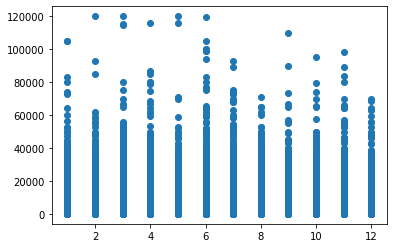

In [65]:
plt.scatter(df_ML.month_of_registration,df_ML.price)

In [66]:
X=df_ML.drop(["price"],1)
y=df_ML.price

In [67]:
#Importing sklearn for splitting data in train and test
from sklearn.model_selection import train_test_split as tts

In [68]:
rs=4

In [69]:
#Train Test Split
X_train,X_test,y_train,y_test=tts(X,y,random_state = rs, test_size= 0.26)

In [95]:
import numpy as np
#y_train.array.reshape(-1, 1)
y_train=np.reshape(y_train,(-1,1))

In [97]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
y_train=sc.fit_transform(y_train)

(35784, 1)

In [102]:
#Importing KNN algorithm
from sklearn.neighbors import KNeighborsRegressor as knr

In [103]:
#Passing parameter of the model
model=knr(n_neighbors =70, metric="euclidean")

In [104]:
#Fitting Model
model.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
                    metric_params=None, n_jobs=None, n_neighbors=70, p=2,
                    weights='uniform')

In [105]:
#Predicting Price
y_pred = model.predict(X_test)

In [106]:
y_pred

array([[0.81971771],
       [0.85819161],
       [0.79179691],
       ...,
       [0.85819161],
       [0.82694792],
       [0.89826666]])

In [107]:
#Checking performance of the model with Error Matric
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [108]:
mean_absolute_error(y_test,y_pred)

5803.12569523797

In [109]:
mean_squared_error(y_test,y_pred)

93449275.03761555

In [110]:
r2_score(y_test,y_pred)

-0.563415609413455

In [111]:
from sklearn.model_selection import cross_val_score

In [112]:
cross_val_score(model,X,y, cv = 10)

array([  -1.44062619,   -7.90552374,  -17.8618328 ,  -24.17071901,
        -42.5231325 ,  -66.11640135,  -82.30722488, -125.8114364 ,
       -204.55830519, -301.9414414 ])